<a href="https://colab.research.google.com/github/StephenMa1511/Risk-Management/blob/main/Risk_Management_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABSTRACT


The price of crude oil plays an essential role in maintaining economic stability. Forecasting crude oil prices is an effective approach to studying the asset's volatility and fluctuation. However, this process presents significant challenges due to the undeniable complexity and volatility of the global energy market. This complexity stems from numerous factors and the interdependence among them, ranging from geopolitical and macroeconomic events to microeconomic attributes such as supply and demand dynamics (Hamilton, 2009).

In terms of the student’s research, this study aims to develop a comprehensive model of the oil markets by applying Probabilistic Graphical Models (PGMs), with a specific focus on Bayesian networks.

Technically, Bayesian networks offer a robust framework to deal with uncertainties and interdependent dynamics in the energy (crude oil) market. They allow the combination and collaboration of different sources of information while providing a structured way to update the models when new evidence emerges (Murphy, 2012). In this way, Bayesian networks can be considered an ideal tool for modeling the complex and stochastic nature of crude oil prices, resulting in more reliable forecasting outcomes.

This study outlines a new quantitative framework to assess crude oil price and volatility forecasts using Bayesian Networks, specifically by suggesting methods for identifying input data and establishing the model framework.

## Step 2 - Problem Formulation

**a. What is the problem the student’s thesis attempts to solve?**

* Alvi aims to accurately forecast the price of oil and understand the structure of the energy market. It is important because "crude oil plays a very pivotal role in the global economy" (Alvi 2). However, the primary challenge addressed in the student's thesis is the accurate forecasting of crude oil prices.Since crude oil prices are influenced by multiple factors, such as macroeconomic factors, geopolitical events and market dynamics; these complexity makes it difficult to develop reliable predictive models. Meanwhile, simplistic models such as suggested in the thesis, often fail to account for these external influences and result in inaccurate predictions (Energy Information Administration, 2021). In addition, processing the a large amount of data from various sources with different structures can be also labor-intensive and challenging.

**b. Why are Bayesian networks well-suited to solve it?**

* The thesis aims to develop a model that can forecast the price of oil using Probabilistic Graphical Models (PGM) which are belief networks (Bayesian Networks) and Markov networks (Markov Chain).

* Bayesian networks are particularly well-suited for forecasting crude oil prices due to their ability to model complex relationships between variables. These networks are more suitable in capturing the interdependencies among macroeconomic, microeconomic, and geopolitical factors, while they are not heavily relied on  the assumption of smooth error systems. According to Yang, Bayesian network is a probabilistic directed acyclic graph (DAG), where nodes represent variables and edges represent causal dependencies among variables. Thus, Bayesian network can model problem which requires the identification of dependencies / causalities and probabilistic relationships. Bayesian network is also able to capture the uncertainties because each edge is a probability. As Alvi mentioned, crude oil prices are influenced by multiple factors, hence, Bayesian network is well suited for the objective.

**c. Advantages of using this methodology to address the problem include:**

*   Able to create a model which has an easy to understand graphical model while also able to do forecasting
*   Bayesian-based model means we can incorporate prior knowledge into the model to enhance its performance. This is useful for oil as knowledge about geopolitical events / knowledge is extremely valuable ((Bariviera, Zunino, and Rosso)



In [ ]:
pip install -q fredapi

In [ ]:
# Loading libraries:
# import fredapi
# from fredapi import Fred
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
import statsmodels.api as sm
import seaborn as sns
from scipy import stats


## Step 3 - Data Retrieval

The data for this project is sourced from public platforms such as Yahoo Finance, FRED, EIA, among others. We classify this data into three distinct categories: macroeconomic, microeconomic, and financial data.

#### MACROECONOMICS DATA:
Macroeconomic data focuses on data of countries and governments. We pick Consumer Price Index and Effective Federal Fund Rate for this category
* Consumer Price Index (CPIENGSL): the average price changes over time paid by US city for energy goods and services
* Effective Federal Fund Rate (EFFR): the interest rate the depository institutions charge for overnight loans of funds

In [ ]:
### mounting drive to import excel file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The paths to FRED data (Macro Data with CPI and EFFR):
fred = fredapi.Fred(api_key='fd269c89c2141092cee85c0440f5333e')
start_date = "2008-01-01"
end_date = "2024-04-01"
CPI = fred.get_series('CPIENGSL', start=start_date, end=end_date)
EFFR = fred.get_series('EFFR', start=start_date, end=end_date)

In [ ]:
marco_data = pd.concat([CPI, EFFR], axis=1, join = 'inner')
marco_data.columns = ['CPI', 'EFFR']
print('marco data')
marco_data

marco data


,CPI,EFFR
2000-08-01,123.800,6.51
2000-09-01,129.200,6.52
2000-11-01,129.200,6.61
2000-12-01,130.100,6.60
2001-01-01,135.000,NaN
...,...,...
2024-01-01,277.897,NaN
2024-02-01,284.175,5.33
2024-03-01,287.399,5.33
2024-04-01,290.631,5.33


#### MICROECONOMIC DATA:
Microeconomic data is mainly on business and individual decisions. In this category, we focus on the data of supply, production, and price of the Crude Oil (in the US).

* Oil Production: monthly oil production data reported by the EIA
* Oil Supply: monthly oil supply data reported by the EIA



In [ ]:
# The paths to Excel files in Google Drive (for Micro Data with Supply, Production, and Price of Crude Oil):
supply_path = '/content/drive/MyDrive/MSFE 9th Course Group (RM)/GWP1/Oil_Supply.xls'
prod_path = '/content/drive/MyDrive/MSFE 9th Course Group (RM)/GWP1/Oil_Production.xls'
# price_path = '/content/drive/MyDrive/MSFE 9th Course Group (RM)/GWP1/Oil_Price.xls'

In [ ]:
# Loading 3 Excel files:
Prod = pd.read_excel(prod_path, "Data 1", skiprows=2, usecols=[0, 1], index_col=0, names=["Date", "Production"])
Supply = pd.read_excel(supply_path, "Data 1", skiprows=2, usecols=[0, 1], index_col=0, names=["Date", "Supply"])
# Price = pd.read_excel(price_path, "Data 1", skiprows=2, usecols=[0, 1], index_col=0, names=["Date", "Price"])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MSFE 9th Course Group (RM)/GWP1/Oil_Production.xls'

In [ ]:
micro_data = pd.concat([Prod, Supply], axis=1, join = 'inner')
micro_data.columns = ['Prod', 'Supply']
micro_data

,Prod,Supply
Date,,
1936-01-15,88820,NaN
1936-02-15,82120,NaN
1936-03-15,90568,NaN
1936-04-15,90479,NaN
1936-05-15,93739,NaN
...,...,...
2023-12-15,411187,629090.0
2024-01-15,389148,607196.0
2024-02-15,379961,578507.0


#### FINANCIAL DATA:

Financial data is about securities and markets. Below is a list of our choice for this segment:

* WTISPLC: WTI price provided by Federal Reserve Economic Data (FRED)
* POILBREUSDM: Brent price provided by FRED
* PNGASEUUSDM: Natural gas price provided by FRED
* WTI Futures: market price of WTI crude oil
* Brend Futures: market price of brend crude oil
* Natural Gas Futures: market price of natural gas
* Chevron Corporation stock: stock price of Chevron
* Exxon Mobil Corporation stock: stock price of Exxon Mobil
* Shell PLC stock: stock price of Shell

In [ ]:
# Financial Data:
fred_key = "fd269c89c2141092cee85c0440f5333e";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_financial_data = pd.DataFrame({'WTISPLC': fred.get_series('WTISPLC'),
                          'POILBREUSDM': fred.get_series('POILBREUSDM'),
                          'PNGASEUUSDM': fred.get_series('PNGASEUUSDM')})
fred_financial_data

In [ ]:
# Loading stock data:
stocks = ['CL=F', 'BZ=F', 'NG=F', 'CVX', 'XOM', 'SHEL']
yfinance_financial_data = yf.download(stocks, start="2000-01-01", end="2024-06-01", period='1d')['Adj Close']
yfinance_financial_data

In [ ]:
# concat the fred and yfinance financial datasets
financial_data = pd.concat([fred_financial_data, yfinance_financial_data], axis=1)

# get only the data between 2000
financial_data = financial_data['2000-01-01':'2024-05-01']

# get the last datapoint for missing values (e.g. a month's first day fall to weekend so no stock data -> we use the last days data)
financial_data = financial_data.fillna(method='ffill')

# get only the first days of the months
financial_data = financial_data[financial_data.index.day == 1]
financial_data

,WTISPLC,POILBREUSDM,PNGASEUUSDM,BZ=F,CL=F,CVX,NG=F,SHEL,XOM
2000-01-01,27.18,25.633333,3.055556,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,29.35,28.030476,3.055556,NaN,NaN,16.879692,NaN,17.328718,19.312801
2000-03-01,29.89,27.494348,3.055556,NaN,NaN,15.398229,NaN,16.660719,17.757647
2000-04-01,25.74,23.153500,3.240000,NaN,NaN,18.915262,NaN,18.173698,18.209978
2000-05-01,28.78,27.805217,3.240000,NaN,NaN,17.661928,NaN,18.114597,18.209978
...,...,...,...,...,...,...,...,...,...
2024-01-01,74.15,79.110000,9.531191,77.040001,71.650002,146.074921,2.514,64.475395,98.261261
2024-02-01,77.25,81.795714,8.098181,78.699997,73.820000,144.831177,2.050,62.790016,100.629822
2024-03-01,81.28,84.961429,8.511036,83.550003,79.970001,151.282364,1.835,62.963425,104.987244
2024-04-01,85.35,88.974545,9.129581,87.419998,83.709999,157.489685,1.837,67.282494,116.047409


In [ ]:
financial_tickers = ['WTI', 'Brent', 'Nat_Gas', 'Brent_F', 'WTI_F','Chevron', 'Nat_Gas_F','Shell', 'Exxon']
financial_data.columns = financial_tickers
financial_data

,WTI,Brent,Nat_Gas,Brent_F,WTI_F,Chevron,Nat_Gas_F,Shell,Exxon
2000-01-01,27.18,25.633333,3.055556,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,29.35,28.030476,3.055556,NaN,NaN,16.879692,NaN,17.328718,19.312801
2000-03-01,29.89,27.494348,3.055556,NaN,NaN,15.398229,NaN,16.660719,17.757647
2000-04-01,25.74,23.153500,3.240000,NaN,NaN,18.915262,NaN,18.173698,18.209978
2000-05-01,28.78,27.805217,3.240000,NaN,NaN,17.661928,NaN,18.114597,18.209978
...,...,...,...,...,...,...,...,...,...
2024-01-01,74.15,79.110000,9.531191,77.040001,71.650002,146.074921,2.514,64.475395,98.261261
2024-02-01,77.25,81.795714,8.098181,78.699997,73.820000,144.831177,2.050,62.790016,100.629822
2024-03-01,81.28,84.961429,8.511036,83.550003,79.970001,151.282364,1.835,62.963425,104.987244
2024-04-01,85.35,88.974545,9.129581,87.419998,83.709999,157.489685,1.837,67.282494,116.047409


#### Combine All Datasets:

This is our newly retrieved data prior to preprocessing and EDA. The frequencies of time series have been all converted to monthly

In [ ]:
data = pd.concat([marco_data, micro_data, financial_data], axis=1)
data.index = pd.to_datetime(data.index)
display(data)

,CPI,EFFR,Prod,Supply,WTI,Brent,Nat_Gas,Brent_F,WTI_F,Chevron,Nat_Gas_F,Shell,Exxon
1936-01-15,NaN,NaN,88820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936-02-15,NaN,NaN,82120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936-03-15,NaN,NaN,90568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936-04-15,NaN,NaN,90479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936-05-15,NaN,NaN,93739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,287.399,5.33,NaN,NaN,81.28,84.961429,8.511036,83.550003,79.970001,151.282364,1.835,62.963425,104.987244
2024-03-15,NaN,NaN,408451.0,616191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,290.631,5.33,NaN,NaN,85.35,88.974545,9.129581,87.419998,83.709999,157.489685,1.837,67.282494,116.047409
2024-04-15,NaN,NaN,397429.0,600252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4 - Input summary
Below is a table showing our data, frequency, source, start date, end date, and other relevant fields.


| Variable  | Frequency | Source                          | Start Date | End Date   | Units     |
|-----------|-----------|---------------------------------|------------|------------|-----------|
| CPI       | Monthly   | FRED     | 2000-01-01 | 2024-04-01 | Index 1982-1984=100     |
| EFFR      | Daily     | FRED                 | 2000-01-01 | 2024-04-01 | Percentage |
| WTISPLC   | Monthly   | FRED                            | 2000-01-01 | 2024-04-01 | USD/barrel|
| POILBREUSDM | Monthly | FRED                            | 2000-01-01 | 2024-04-01 | USD/barrel|
| PNGASEUUSDM | Monthly | FRED                            | 2000-01-01 | 2024-04-01 | USD/MMBTU       |
| CL=F      | Daily     | Yahoo Finance                   | 2000-01-01    | 2024-04-01    | USD/barrel|
| BZ=F      | Daily     | Yahoo Finance                   | 2000-01-01     | 2024-04-01    | USD/barrel|
| NG=F      | Daily     | Yahoo Finance                   | 2000-01-01     | 2024-04-01    | USD/MMBTU       |
| CVX       | Daily     | Yahoo Finance                   | 2000-01-01     | 2024-04-01    | USD       |
| XOM       | Daily     | Yahoo Finance                   | 2000-01-01     | 2024-04-01    | USD       |
| SHEL      | Daily     | Yahoo Finance                   | 2000-01-01     | 2024-04-01  | USD       |


## STEP 5 & 6: Data cleanning and Preprocessing

### Filling missing value


Firstly, since the datetime indices of the time series in our dataframe do not match due to varying timestamps in the retrieved data, we will employ the forward-fill (ffill) method to fill NaN values with their preceding values. Additionally, we will exclude all rows with indices corresponding to the 15th day of each month. This method is straightforward yet effective as it preserves the chronological order of the time series data by using the last valid observation to fill missing values.

In [ ]:
data.ffill(inplace=True)
data = data.drop(data.index[data.index.day == 15])
data.dropna(inplace=True)

data

,CPI,EFFR,Prod,Supply,WTI,Brent,Nat_Gas,Brent_F,WTI_F,Chevron,Nat_Gas_F,Shell,Exxon
2007-08-01,206.412,5.30,156175.0,643155.0,72.39,71.313043,7.790000,75.349998,76.529999,44.235016,6.352,32.296959,47.115017
2007-09-01,206.412,5.30,154060.0,651790.0,79.93,76.772000,7.790000,72.690002,74.040001,45.903095,5.468,32.280266,47.242760
2007-10-01,212.386,4.92,147061.0,612438.0,86.20,82.507391,8.560000,77.639999,80.239998,49.397095,7.050,34.784210,51.772518
2007-11-01,223.814,4.59,155680.0,634769.0,94.62,92.731364,8.560000,89.720001,93.489998,46.572624,8.637,35.727798,48.769196
2007-12-01,223.814,4.59,151021.0,616040.0,91.73,91.519524,8.560000,88.260002,88.709999,46.217033,7.302,34.267529,49.323917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,277.897,5.33,411187.0,629090.0,74.15,79.110000,9.531191,77.040001,71.650002,146.074921,2.514,64.475395,98.261261
2024-02-01,284.175,5.33,389148.0,607196.0,77.25,81.795714,8.098181,78.699997,73.820000,144.831177,2.050,62.790016,100.629822
2024-03-01,287.399,5.33,379961.0,578507.0,81.28,84.961429,8.511036,83.550003,79.970001,151.282364,1.835,62.963425,104.987244
2024-04-01,290.631,5.33,408451.0,616191.0,85.35,88.974545,9.129581,87.419998,83.709999,157.489685,1.837,67.282494,116.047409


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2007-08-01 to 2024-05-01
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CPI        202 non-null    float64
 1   EFFR       202 non-null    float64
 2   Prod       202 non-null    float64
 3   Supply     202 non-null    float64
 4   WTI        202 non-null    float64
 5   Brent      202 non-null    float64
 6   Nat_Gas    202 non-null    float64
 7   WTI_F      202 non-null    float64
 8   Brent_F    202 non-null    float64
 9   Nat_Gas_F  202 non-null    float64
 10  Chevron    202 non-null    float64
 11  Exxon      202 non-null    float64
 12  Shell      202 non-null    float64
dtypes: float64(13)
memory usage: 22.1 KB


### Cleaning outlier
Now that we have cleared missing values, we'll move on to examime if there are outstanding outliers in our data

In [ ]:
### Checking the outliers of the data (over the range of 3 STDs):
#Creating a temporal data frame with z-score of each column
df_1=data.apply(zscore)
#loop to assign outliers to df2
for x in df_1.columns:
 df2=(df_1[(df_1[x] > 3) & (df_1[x] < -3)])
 df2
if df2.empty:
    print("There are no outliers.")
else:
    print("There are outliers.")

There are no outliers.


Luckily for us, the data has no outlier that need to handle

### Stationarizing and normalizing data

Stationarizing and normalizing are crucial steps in our data preprocessing process. These steps ensure that our variables' distributions become stationary and comparable to each other, thereby enhancing the predictive performance of our model.

First, we'll convert the normal time series in our data to simple return and check their stationarity

In [ ]:
ret_data = data.pct_change()
ret_data.dropna(inplace=True)
ret_data

,CPI,EFFR,Prod,Supply,WTI,Brent,Nat_Gas,Brent_F,WTI_F,Chevron,Nat_Gas_F,Shell,Exxon
2007-09-01,0.000000,0.000000,-0.013543,0.013426,0.104158,0.076549,0.000000,-0.035302,-0.032536,0.037709,-0.139169,-0.000517,0.002711
2007-10-01,0.028942,-0.071698,-0.045430,-0.060375,0.078444,0.074707,0.098845,0.068097,0.083738,0.076117,0.289320,0.077569,0.095883
2007-11-01,0.053808,-0.067073,0.058608,0.036462,0.097680,0.123916,0.000000,0.155590,0.165130,-0.057179,0.225106,0.027127,-0.058010
2007-12-01,0.000000,0.000000,-0.029927,-0.029505,-0.030543,-0.013068,0.000000,-0.016273,-0.051128,-0.007635,-0.154568,-0.040872,0.011374
2008-01-01,0.013230,0.000000,0.049040,0.042625,0.013300,0.006252,0.199766,0.063336,0.081952,0.063348,0.024788,0.034017,0.050807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,-0.009078,0.000000,0.030911,0.012537,0.031293,0.020235,-0.156255,-0.023327,-0.032672,0.030039,-0.106610,0.005655,-0.029226
2024-02-01,0.022591,0.000000,-0.053598,-0.034803,0.041807,0.033949,-0.150349,0.021547,0.030286,-0.008514,-0.184566,-0.026140,0.024105
2024-03-01,0.011345,0.000000,-0.023608,-0.047248,0.052168,0.038703,0.050981,0.061627,0.083311,0.044543,-0.104878,0.002762,0.043301
2024-04-01,0.011246,0.000000,0.074981,0.065140,0.050074,0.047235,0.072676,0.046320,0.046768,0.041031,0.001090,0.068596,0.105348


In [ ]:
from statsmodels.tsa.stattools import adfuller
p_threshold = 0.05

for col in ret_data.columns:
    result = adfuller(ret_data[col])
    print(f'ADF Statistic for {col}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < p_threshold:
        print(f'{col} returns is stationary')
    else:
        print(f'{col} returns is not stationary')
    print("=========================")



ADF Statistic for CPI: -13.002459433078666
p-value: 2.6697093238630815e-24
CPI returns is stationary
ADF Statistic for EFFR: -5.990177277192361
p-value: 1.7532421984732866e-07
EFFR returns is stationary
ADF Statistic for Prod: -4.623099935303433
p-value: 0.00011708144039082389
Prod returns is stationary
ADF Statistic for Supply: -4.757730010131382
p-value: 6.547006744649971e-05
Supply returns is stationary
ADF Statistic for WTI: -8.789748605597914
p-value: 2.257363687151859e-14
WTI returns is stationary
ADF Statistic for Brent: -8.388880533661741
p-value: 2.3965779502247404e-13
Brent returns is stationary
ADF Statistic for Nat_Gas: -2.894232603299266
p-value: 0.04602278953294148
Nat_Gas returns is stationary
ADF Statistic for Brent_F: -8.746049951017874
p-value: 2.920860714193254e-14
Brent_F returns is stationary
ADF Statistic for WTI_F: -10.05863630803738
p-value: 1.3519192340221095e-17
WTI_F returns is stationary
ADF Statistic for Chevron: -15.755164179560985
p-value: 1.2100895849211

With the ADF test, we can see that after converting to simple return, all the time series passed the stationary test.

Next we'll split the data into train, validation, and test set with the ratio 80-10-10 and then apply standard scaler for normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into train, validation, and test sets
train_data, temp_data = train_test_split(ret_data, test_size=0.3, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Normalize the data
scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (140, 13)
Validation data shape: (30, 13)
Test data shape: (31, 13)


## Step 7 & 8: EDA

### Plot time series

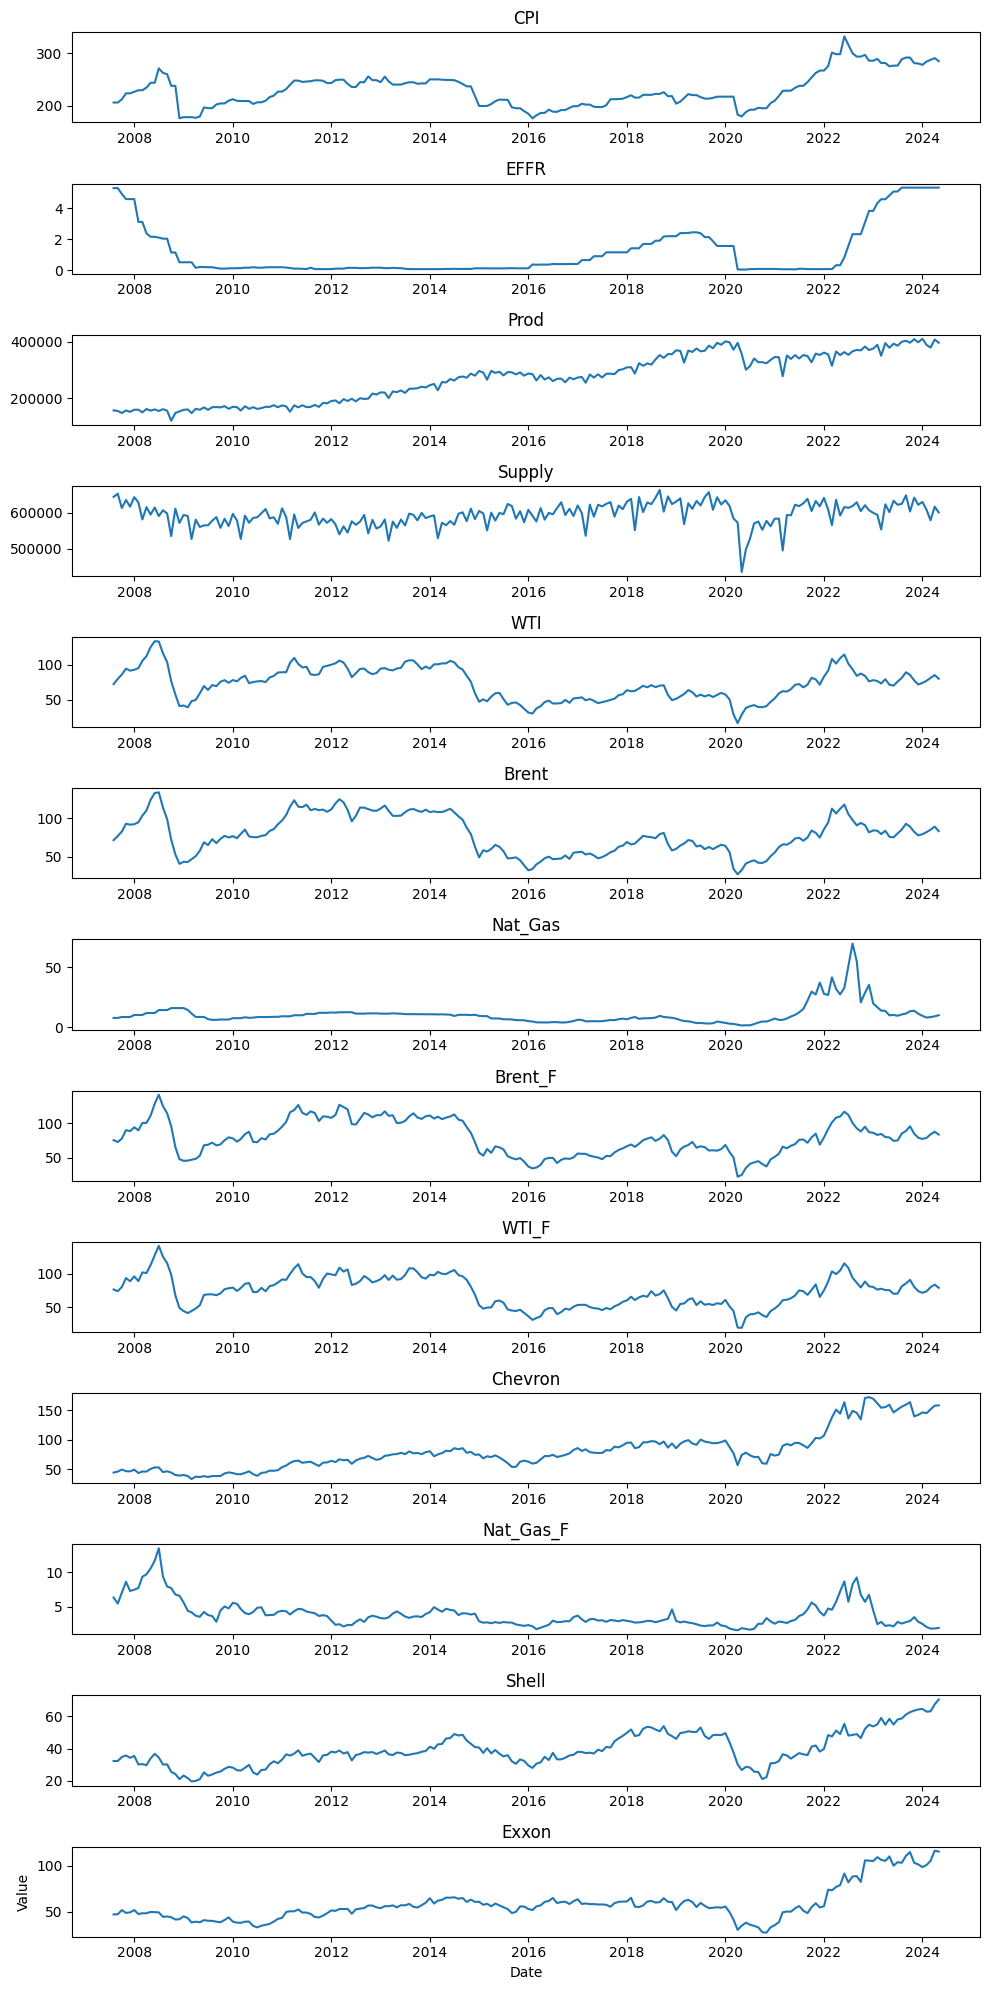

In [ ]:
# Plot time series
fig, axes = plt.subplots(nrows=len(data.columns), figsize=(10, 20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=10, wspace=None, hspace=None)

# fig.suptitle('Time Series Plots'
for i, col in enumerate(data.columns):
    axes[i].plot(data[col])
    axes[i].set_title(col)
    # axes[i].set_xlabel('Date')
    # axes[i].set_ylabel('Value')
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


### Correlation

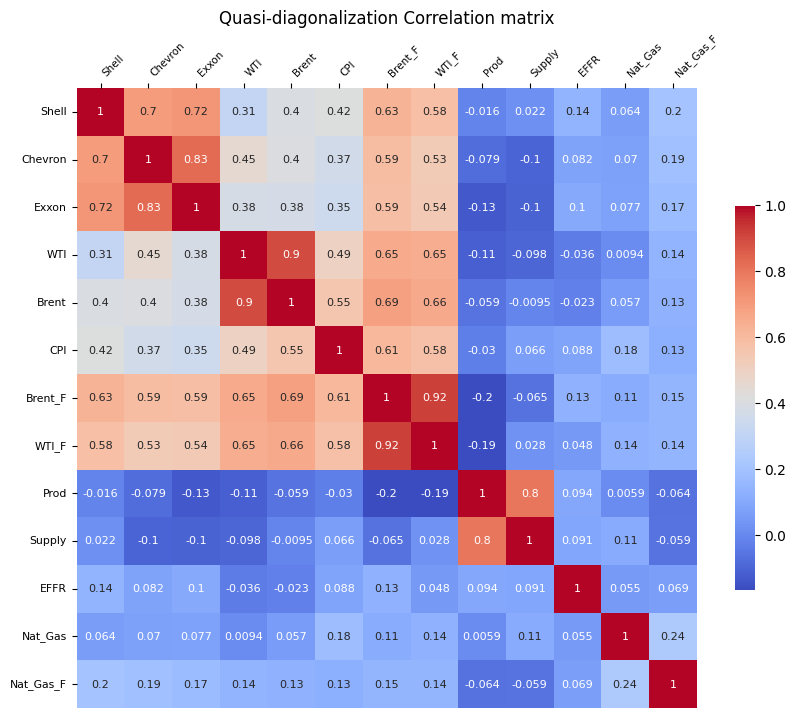

In [ ]:
from scipy.cluster import hierarchy
corr = ret_data.corr()

order = np.array(hierarchy.dendrogram(hierarchy.ward(corr), no_plot=True)['ivl'], dtype="int") # re-arrange the index to detect cluster of high/low correlation value
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr.iloc[order,order],robust = True, cmap = 'coolwarm', square=True,
    annot=True, annot_kws={'size': 8}, cbar_kws={'shrink': 0.5}) #argument robust: the colormap range is computed with robust quantiles instead of the extreme values.
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left', fontsize = 7.5)
plt.yticks(rotation=0, ha='right', fontsize = 7.8)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(corr.columns)))
# plt.gca().set_xticklabels(corr.iloc[order,order].columns, rotation=0, ha='left', fontsize = 8)
# plt.yticks(rotation=0, ha='right',fontsize = 5)
# Get the Y-axis tick labels and positions
# plt.gca().yaxis.set_major_locator(plt.MaxNLocator(len(corr)))
# plt.gca().set_yticklabels(corr.iloc[order,order].index, rotation=0, ha='right', fontsize = 8)
plt.title('Quasi-diagonalization Correlation matrix')
plt.show()

The correlation matrix above is generated from a quasi-diagonalized matrix, which comes from the normal correlation matrix but the rows and columns has been re-arranged so that the highest (absolute) correlations are along the diagonal

From the correlation matrix above, we observe the following:

* WTI and Brent exhibit a strong correlation, with a Pearson correlation coefficient of 0.9.

* Exxon stock, Chevron, and Shell stock form a distinct cluster, showing intra-cluster correlations above 0.7.

* CPI shows significant correlations with the three stock prices and has a high correlation with oil prices (WTI, Brent), while its correlation with other variables is minimal.



### Distributional analysis
In this section, we'll examine the distributional properties of returns of each time series in our data set

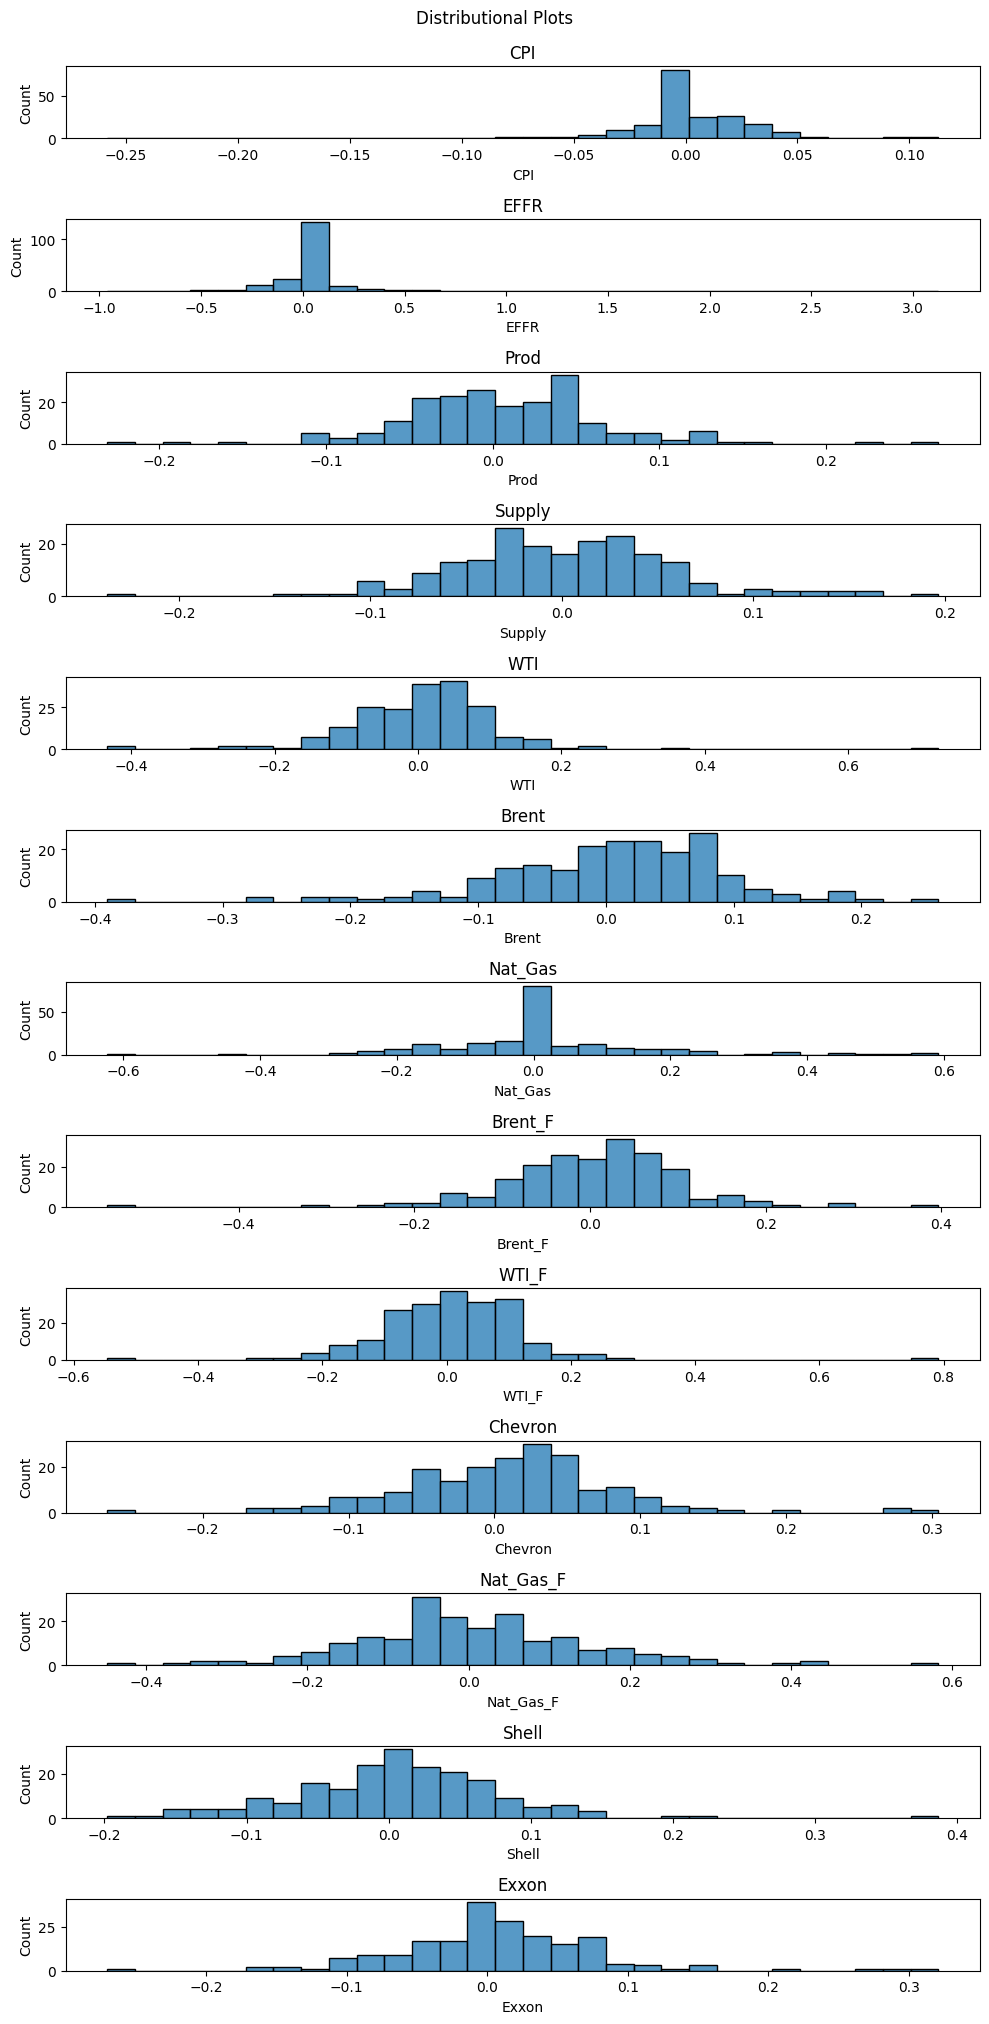

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(ret_data.columns), figsize=(10, 20))

# Plot the distribution of each time series
for i, col in enumerate(ret_data.columns):
    sns.histplot(ret_data[col], ax=axes[i], bins = 30)
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.suptitle("Distributional Plots",y = 1.01)
plt.show()


In [ ]:
import scipy.stats as stats

skewness = []
kurtosis = []
for col in ret_data.columns:
  skewness.append(stats.skew(ret_data[col]))
  kurtosis.append(stats.kurtosis(ret_data[col]))

# Create a DataFrame with the results
df_skewness_kurtosis = pd.DataFrame({
    "Time Series": ret_data.columns,
    "Skewness": skewness,
    "Kurtosis": kurtosis
})

# Compare skewness with normal distribution
df_skewness_kurtosis["Skew Type"] = df_skewness_kurtosis["Skewness"].apply(lambda x: "Left Skew" if x < 0 else "Right Skew" if x > 0 else "Symmetric")

# Compare kurtosis with normal distribution
df_skewness_kurtosis["Kurtosis Type"] = df_skewness_kurtosis["Kurtosis"].apply(lambda x: "Leptokurtosis" if x > 3 else "Mesokurtosis" if x == 3 else "Platykurtosis" if x < 3 else "Undefined")

# Display the DataFrame
print(df_skewness_kurtosis.to_string())


   Time Series  Skewness   Kurtosis   Skew Type  Kurtosis Type
0          CPI -2.338198  17.807015   Left Skew  Leptokurtosis
1         EFFR  4.973165  37.907999  Right Skew  Leptokurtosis
2         Prod  0.244409   2.919181  Right Skew  Platykurtosis
3       Supply  0.032867   1.504362  Right Skew  Platykurtosis
4          WTI  0.672373   9.803159  Right Skew  Leptokurtosis
5        Brent -0.757651   2.110058   Left Skew  Platykurtosis
6      Nat_Gas  0.613782   3.524585  Right Skew  Leptokurtosis
7      Brent_F -0.682032   4.898354   Left Skew  Leptokurtosis
8        WTI_F  0.804368  10.890818  Right Skew  Leptokurtosis
9      Chevron  0.356321   2.681421  Right Skew  Platykurtosis
10   Nat_Gas_F  0.413799   1.515563  Right Skew  Platykurtosis
11       Shell  0.506359   3.195942  Right Skew  Leptokurtosis
12       Exxon  0.579263   3.852408  Right Skew  Leptokurtosis


From the plots and table above, we could see that the skewness and kurtosis of the time series are not symetric. Let's take a Shapiro-Wilk test to see if they could possibly be from normal distribution

In [ ]:
from scipy.stats import shapiro

# Loop through each time series in ret_data
for col in ret_data.columns:
  # Perform the Shapiro-Wilk test
  stat, p = shapiro(ret_data[col])

  # Print the results
  print(f"Time series: {col}")
  print(f"Shapiro-Wilk statistic: {stat}")
  print(f"p-value: {p}")

  # Interpret the results
  if p > 0.05:
    print(f"{col} is likely normally distributed.")
  else:
    print(f"{col} is not likely normally distributed.")
  print("========================================")



Time series: CPI
Shapiro-Wilk statistic: 0.772391676902771
p-value: 2.2799003506092765e-16
CPI is not likely normally distributed.
Time series: EFFR
Shapiro-Wilk statistic: 0.4974164366722107
p-value: 1.3161562813125434e-23
EFFR is not likely normally distributed.
Time series: Prod
Shapiro-Wilk statistic: 0.9574054479598999
p-value: 9.963060620066244e-06
Prod is not likely normally distributed.
Time series: Supply
Shapiro-Wilk statistic: 0.9803909659385681
p-value: 0.006561532616615295
Supply is not likely normally distributed.
Time series: WTI
Shapiro-Wilk statistic: 0.8834467530250549
p-value: 2.314751341991883e-11
WTI is not likely normally distributed.
Time series: Brent
Shapiro-Wilk statistic: 0.9606380462646484
p-value: 2.2126689145807177e-05
Brent is not likely normally distributed.
Time series: Nat_Gas
Shapiro-Wilk statistic: 0.8959046602249146
p-value: 1.2890614964344849e-10
Nat_Gas is not likely normally distributed.
Time series: Brent_F
Shapiro-Wilk statistic: 0.942583024501

As the test shown, all of our variable is not normally distributed, this result is inline with their the skewness and kurtosis score from table above

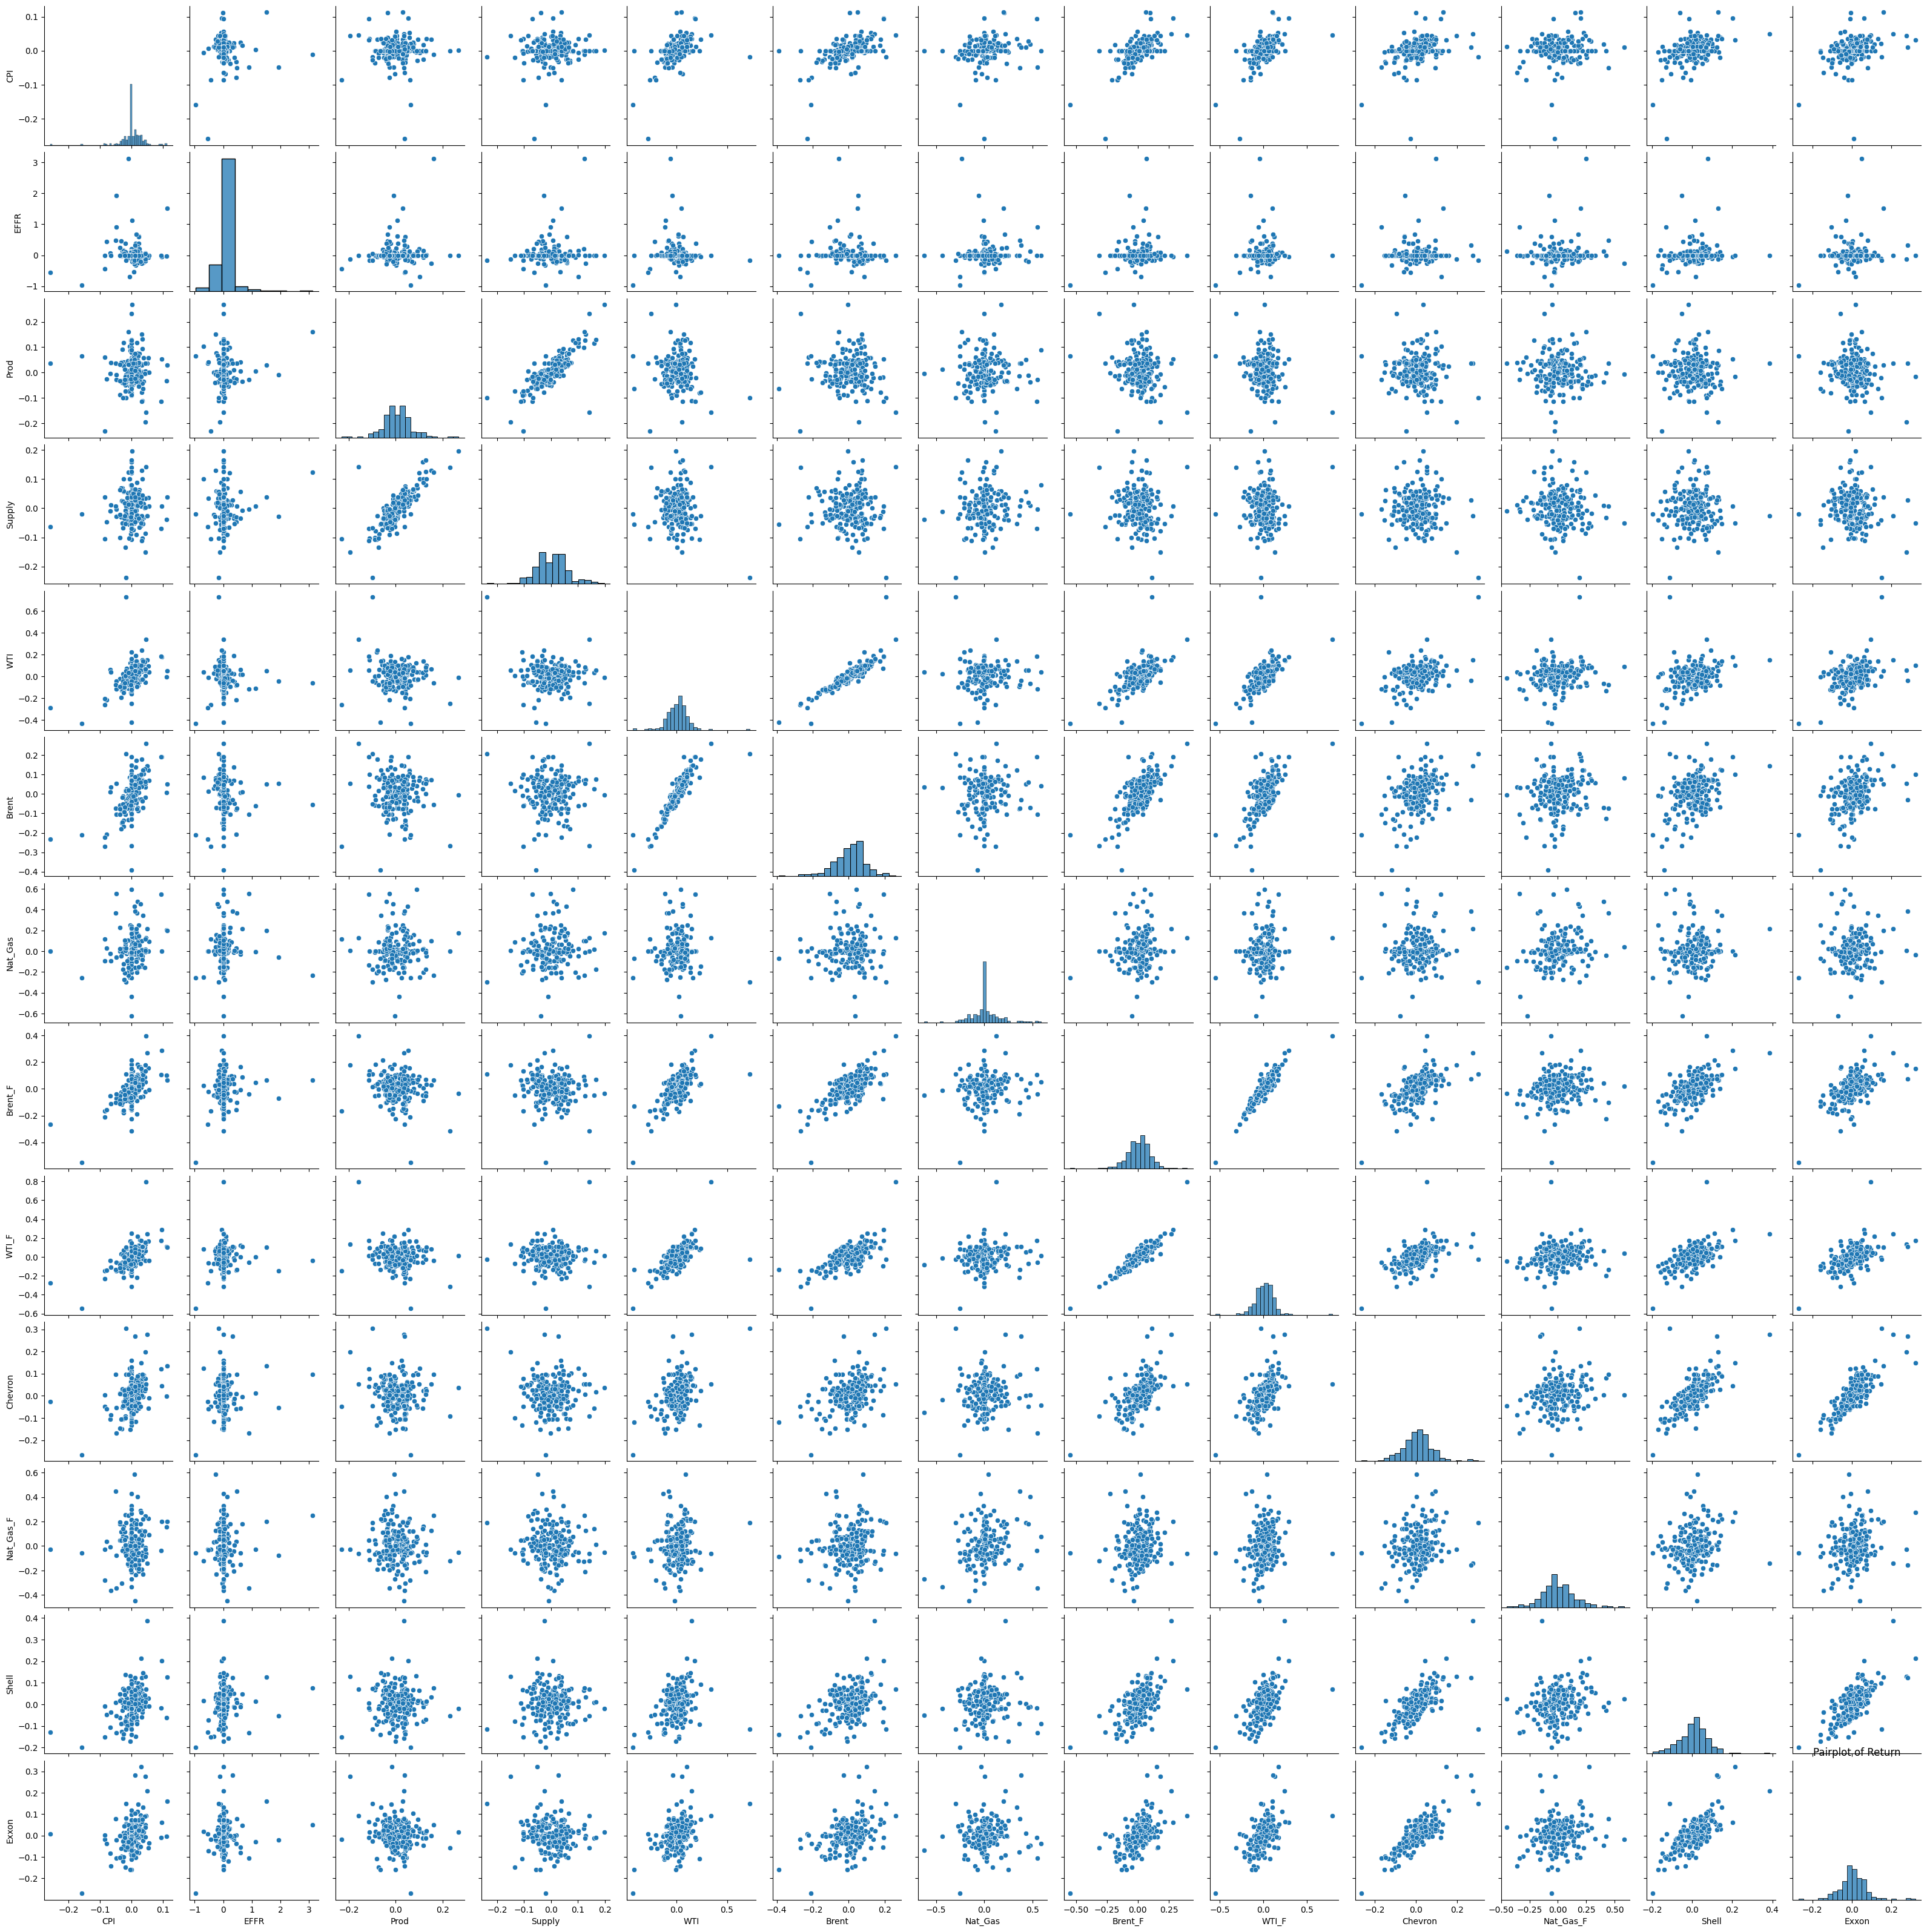

In [ ]:
sns.pairplot(ret_data)
plt.title("Pairplot of Return")
plt.show()

### Autocorrelation analysis

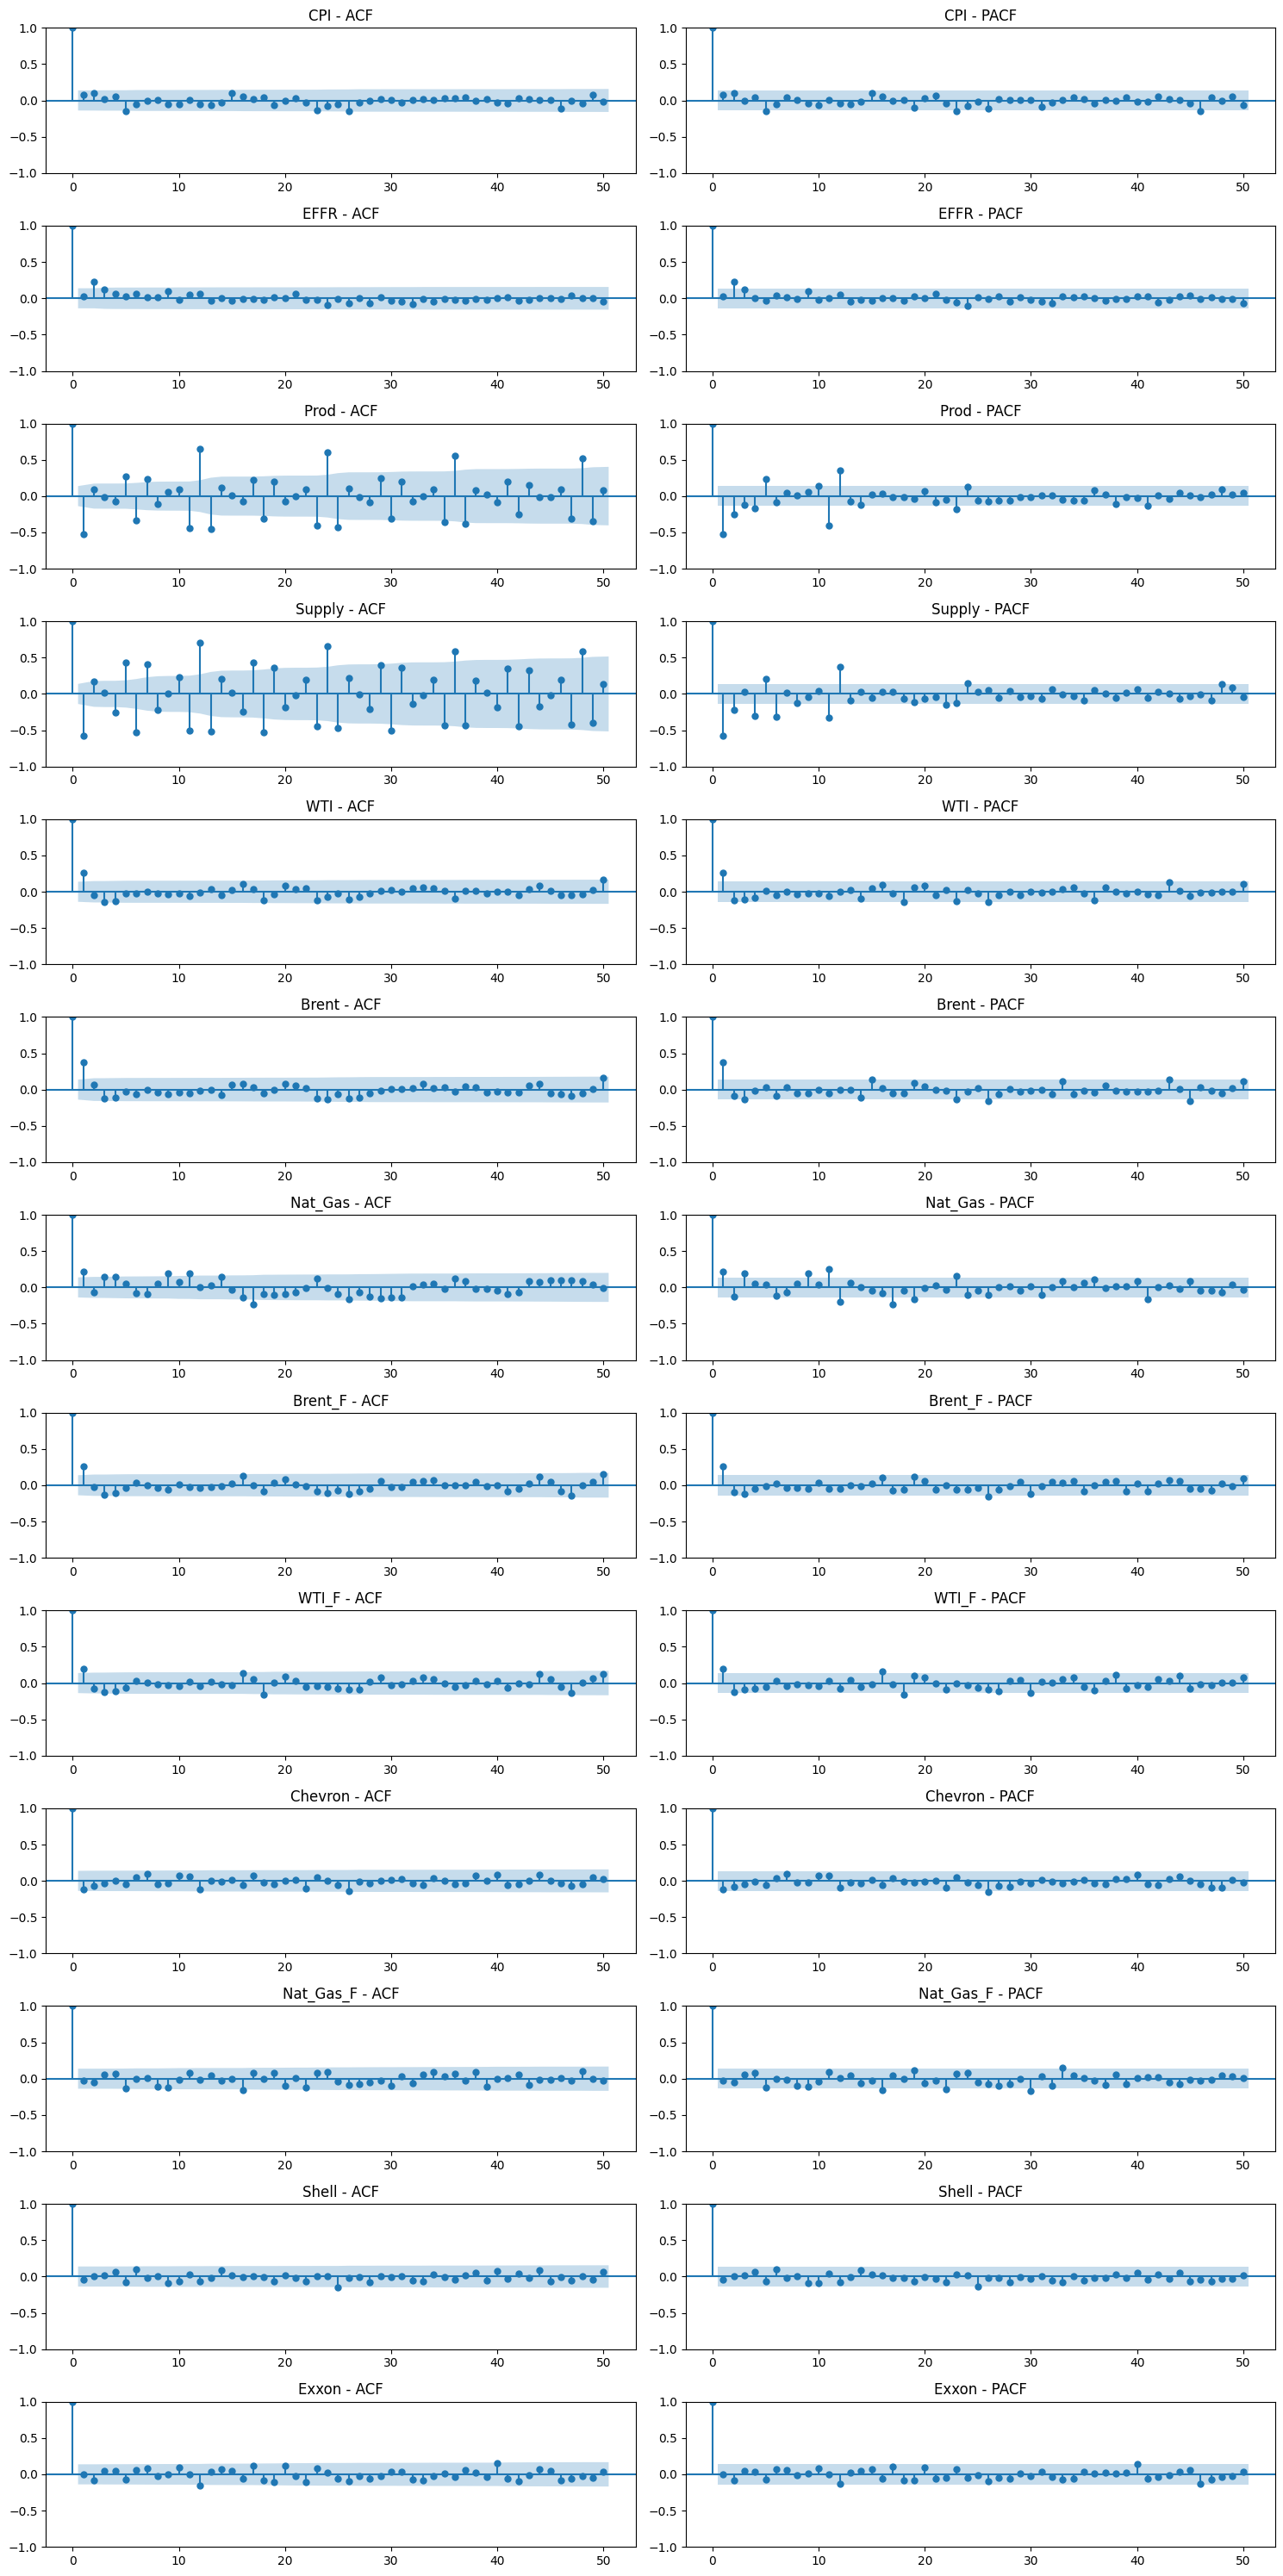

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(ret_data.columns), ncols=2, figsize=(15, 30))

# Plot the ACF and PACF for each time series
for i, col in enumerate(ret_data.columns):
    sm.graphics.tsa.plot_acf(ret_data[col], lags=50, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} - ACF")
    sm.graphics.tsa.plot_pacf(ret_data[col], lags=50, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} - PACF")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


From the resulting ACF and PACF plot, we could conclude that at monthly frequency, oil (WTI) price  exhibit statistically significant autocorrelation with lag 1, the fact that both ACF and PACF plot show significanly autocorrelation at lag 1 and no autocorrelation at other lag period show that, the oil price return of last month has a 'momentum' impact on this month return

## Step 9: Model Summary

### A. Probabilistic Graphical Models (Belief Networks & Markov Networks)

Probabilistic Graphical Models (PGMs) are a graphical illustration of a joint distribution which exploits dependencies between different random variables (Alvi 7). There are two groups of Graphical Models, belief networks and Markov networks.

**Belief network** is a directed acyclic graph in which nodes represent domain variables. Prior probabilities are assigned to source nodes, and conditional probabilities are associated with arcs (edges). Formally, for every source node $ x_i $, with one or more direct predecessors $ \pi_i $, there is a conditional probability function $ P(x_i | \pi_i) $. A belief network represents a full join probability space over n variables in the network (Cooper 395).

$$ P(X_1, ..., X_n) = \Pi_{i=1}^{n} P(X_i|\pi_i) $$

Belief network is also known as Bayesian belief network, causal net, causal network, probabilistic causal network, probabilistic cause-effect model and probabilistic influence diagram (Cooper 393).

**Markov network**, also known as Markov random field, is an undirected graph (that may be cyclic) which defines a joint distribution over random variables X = (X1, ... X_N):

$$ P(X=x) = \frac{Weight(x)}{Z} $$

where

$$ Z = \sum_{x} Weight(x) $$

is the normalization constant (CS221 Course Material).

The main difference between Markov Network and Belief Network is that Markov Network is undirected and can contain cycle, while Belief Network is directed and acyclic. However, both are graphical models that can represent joint probability distribution (Wong)

### B. Parameter Learning & Structure Learning

**Parameter Learning** is estimating the values of the parameters given the data and the graph while **structure learning** is inferring the graph and parameters from the data (Goldenberg).

According to Alvi, **parameter learning** is an estimation problem of a lower dimension which is computationally feasible. Given the graph, $ G $ with parametric model $ p(x_v; \theta) $ such that for each node $ v \in V $ we can associate a subset of the parameters $ \theta_{v|pa(v)} \subset \theta $ and express the conditional density of v given its parents

$$ p_{v|pa(v)}(x_v;\theta) = p_{v|pa(v)}(x_v;\theta_{v|pa(v)}) $$

Parameter learning is of two main types: Maximum Likelihood Estimation (Frequentist) and Bayesian Estimation. According to the Frequentist, $ \theta $ are unknown constants while according to Bayesian $ \theta $ are random variables (Goldenberg).

Given data D, **structure learning** is a process of finding a directed acyclic graph, G, that maximizes $ P(G | D) $ without having any prior knowledge on the graph structure (Alvi). We can express the quantity as follows:

$$ P(G | D) \propto P(G) P(D|G) $$

For illustration, if we have a Bayesian network with a known structure, **parameter learning** is the process to determine the conditional probability for each node using the data. In contrast, in **structure learning**, we only have the data and we are tasked with discovering the relationships and constructing the graph that best represent the relationships.

### C. Markov Chains & Markov Blankets

**Markov chain** is a graphical abstraction of a stochastic process that transition between a finite number of states (Alvi). A Markov chain is a sequence $ X_0, X_1, ... $ where $ X_i$ is the vector of probabilities of finding the stystem in each time state at time i, and the probability of transitioning from $ X_i $ to $ X_{i+1} $ depend only on the observed value of $ X_i $ (Grewal, Krzywinski and Altman).

**Markov blanket** defines the boundaries of a system. It is a statistical partitioning of a system into internal states and external states, where the blanket itself consists of the states that separate the two (Kirchhoff, et al). Markov blanket of a node v, is the union of it's parents, children and it's children's parents, every set of nodes is conditionally independent of v when conditioned on the Markov blanket of v (Alvi).


## Step 10: Pseudocode of Algorithm1: Inferred Causality

```
Algorithm InferredCausality
Input: a dataset containing variables Xi (i = 1, ..., m)
Output: a partial directed acyclic graph (PDAG)

Procedure InferredCausality(Data)
    INIT G AS AdjacencyMatrix
    // Phase 1: Learning Markov Blankets
    # Construct Markov Blanket for each data point
    INIT Mb AS DICTIONARY
    FOR EACH Xi in Data DO
        Mb(Xi) = LearnMarkovBlanket(Xi)
    END FOR
    
    # Check if they are symmetric
    INIT Pairs AS ARRAY
    FOR EACH (Xi, Xj) in Data DO
        IF (Xi in Mb(Xj) and Xj in Mb(Xi)) THEN
            APPEND (Xi, Xj) to Pair
        END IF
    END FOR
    
    // Phase 2: Learning Neighbors
    INIT Neighbors AS DICTIONARY of ARRAY
    FOR EACH (Xi, Xj) in Pairs DO
      IF FindConditionallyIndependentSet(Xi, Xj) is not nil THEN
        APPEND Xi to Neighbors[Xj]
        APPEND Xj to Neighbors[Xi]
      END IF
    END FOR
    
    FOR EACH Xi in Pairs[0] DO
      FOR EACH neighbor in Neighbors[Xi] DO
         IF Xi not in Neighbors[neighbor] THEN
            APPEND Xi to Neighbors[neighbor]
        END IF
    END FOR
    
    // Phase 3: Learning Arc Directions
    # begin constructing our PDAG
    FOR EACH (Xi, Xj) in Data DO
      IF Xi not in Neighbors(Xj) AND Xj not in Neighbors[Xi] THEN
        FOR EACH Xk = intersection Neighbors(Xi) and Neighbors[Xj] DO
          IF Xk not in FindConditionallyIndependentSet(Xi, Xj) THEN
            UPDATE AdjacencyMatrix SET edge Xi -> Xk
            UPDATE AdjacencyMatrix SET edge Xk -> Xj
            REMOVE Xk from Neighbors[Xi]
            REMOVE Xk from Neighbors[Xj]
          END IF
        END FOR
      END IF
    END FOR

    # loop until complete
    WHILE Neighbors is not empty DO
      FOR EACH Xi in Data DO
        IF Xi not in Neighbors THEN
          CONTINUE
        FOR EACH n in Neighbors[Xi] DO
          IF DirectedPathExist(AdjacencyMatrix, Xi, n) THEN
             UPDATE AdjacencyMatrix SET edge Xi -> n
             REMOVE n from Neighbors[Xi]
          ELSE
             FOR Xj in Data DO
               IF Xj not in Neighbors[Xi] AND DirectedPathExist(AdjacencyMatrix, Xj, Xi) THEN
                 UPDATE AdjacencyMatrix SET edge Xi -> n
               END IF
             END FOR
          END IF
        END FOR
        IF Neighbors[Xi] is empty DO
          REMOVE Xi from Neighbors
        END IF
      END FOR
  
  RETURN AdjacencyMatrix

End Procedure

Procedure LearnMarkovBlanket(Xi)
    // OUT OF SCOPE
End Procedure

Procedure FindConditionallyIndependentSet(Xi, Xj)
    // OUT OF SCOPE
End Procedure

```

## References

Alvi, Danish A. "Application of Probabilistic Graphical Models in Forecasting

Crude Oil Price." University College London, 2018, https://arxiv.org/abs/1804.10869.

Bariviera, Aurelio F., Luciano Zunino, and Osvaldo A. Rosso. "Crude Oil Market and Geopolitical Events: An Analysis Based on Information-Theory-Based Quantifiers." 2017. arXiv, https://arxiv.org/abs/1704.04442.

Cooper, Gregory F. "The Computational Complexity of Probabilistic Inference Using Bayesian Belief Networks." Artificial Intelligence, vol. 42, no. 2-3, 1990, pp. 393-405. Elsevier Science Publishers B.V., doi:10.1016/0004-3702(90)90060-D.

Energy Information Administration (2021). Annual Energy Outlook 2021.

Goldenberg, Anna. "Bayes Nets: Learning Parameters and Structure." Carnegie Mellon University, 8 Nov. 2005, https://www.cs.cmu.edu/~awm/15781/slides/Param_Struct_Learning05v1.pdf. PDF file.

Grewal, Jasleen K., Martin Krzywinski, and Naomi Altman. "Markov Models—Markov Chains." Nature Methods, vol. 16, no. 8, 2019, pp. 663-664. Nature Publishing Group, https://doi.org/10.1038/s41592-019-0476-x. Accessed 30 Nov. 2023.

Hamilton, J. D. (2009). Causes and Consequences of the Oil Shock of 2007-08. Brookings Papers on Economic Activity, 2009(1), 215-261.

Kirchhoff, Michael, et al. “The Markov Blankets of Life: Autonomy, Active Inference and the Free Energy Principle.” Journal of the Royal Society Interface, vol. 15, no. 138, Jan. 2018, p. 20170792, doi:10.1098/rsif.2017.0792.

Koller, D., & Friedman, N. (2009). Probabilistic Graphical Models: Principles and Techniques. MIT Press.

Jensen, F. V., & Nielsen, T. D. (2007). Bayesian Networks and Decision Graphs. Springer.

"Markov Networks and Sampling." CS221 Course Material, Stanford University, 22 Feb. 2021, https://stanford-cs221.github.io/winter2021-extra/modules/csps/markov-networks-and-sampling.pdf. PDF file.

Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.

Pearl, J. (1988). Probabilistic Reasoning in Intelligent Systems: Networks of Plausible Inference. Morgan Kaufmann.

Wong, Weng-Keen. "Undirected Graphical Models 3 Bayesian Networks and Markov
Networks." Oregon State University, 22 Jan. 2020, https://classes.engr.oregonstate.edu/eecs/winter2020/cs536/slides/undirected3.4pp.pdf. PDF file.

Yang, Xin-She. “Mathematical Foundations.” Elsevier eBooks, 2019, pp. 19–43, doi:10.1016/b978-0-12-817216-2.00009-0.